<img
    src="https://upload.wikimedia.org/wikipedia/commons/4/42/CNAM_Logo.svg" 
    alt=""
    height="200px" 
    width="200px"
    align=left
/> 

<center> <br>
  <h1 style="color:#7c7979";></h1>
</center>  

<center>
  <h1 style="color:#000000";>Interactivité des carnets avec IPywidgets en Python</h1>
</center> 


Ce carnet n'a pas vocation à faire une démonstration exaustive de toutes les fonctionnalités de la librairie `IPywidgets`. Il fournit quelques éléments essentiels pour rendre intéractif l'affichage et le tracé des données.

Pour une description complète de la librairie IPywidgets consulter la [documentation de Jupyter Widgets](http://ipywidgets.readthedocs.io/en/latest/index.html).

## 1 - Qu'est-ce qu'un widget ?
**Widget** : contraction de l'anglais *windows* et *gadget* (gadget fenêtre).   
Les widgets sont tous les objets graphiques que l'on peut insérer dans une interface (fenêtre).

Chaque widget a des propriétés et des méthodes qui permettent de régler son apparence et les interactions avec l'utilisateur.

La librairie `IPywidgets` met à disposition un ensemble de widgets HTML interactifs pour les notebooks Jupyter (avec un noyau python).

Ces widgets interactifs rendent les notebooks dynamiques en donnant la possibilité à l'utilisateur de contrôler ses données et de visualiser les changements directement au niveau des données ou des graphes qui en sont issus.

Pour utiliser la librairie `IPywidgets` on fait l'import suivant (où un alias est utilisé pour renommer ipywidgets en widgets) :

In [15]:
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')

## 2 - Les widgets de IPywidgets

Il existe de nombreux widgets distribués avec IPython. Les principaux sont les suivants
* les **widgets numériques** : ils permettent le choix et l'affichage de nombres entiers ou flottants
    * les curseurs (*sliders*)
    * les barres de progression
    * les barre de texte avec saisie numérique (*IntText, FloatText*)
    * ...
* les **widgets booléens** : ils permettent de choisir entre deux options (binaire)
    * les boutons de commande (*toggle boxes*)
    * les cases à cocher (*checkboxes*)
    * ...
* les **widgets de selection** : ils permettent d'afficher une liste de choix
    * les menus déroulant (*dropdown*)
    * les *radiobuttons* (façon cases de QCM à cocher)
    * les listes de choix (*select*)
    * ...
* les **widgets de chaînes de caractères** : ils permettent l'affichage d'une zone de texte dédiée à la saisie

$\rightarrow$ Tous ces widgets sont répertoriés et documentés en détail dans la [Widget List](http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) de la documentation de Jupyter Widgets.

On décrit seulement ici à titre d'illustration les widgets de type *Sliders* et *Select*.

### Les *Sliders*

#### Les *sliders* à valeurs entières : `IntSlider` 

In [2]:
widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    orientation='horizontal'
)

IntSlider(value=7, description='Test:', max=10)

#### Les *sliders* à valeurs entières : `FloatSlider` 

In [3]:
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    orientation='horizontal',
)

FloatSlider(value=7.5, description='Test:', max=10.0)

### Les *Select*

In [4]:
widgets.Select(
    options=['R', 'Python'],
    value='Python',
    # rows=10,
    description='Langage:',
    disabled=False
)

Select(description='Langage:', index=1, options=('R', 'Python'), value='Python')

## 3 - La fonction `interactive`

La fonction `interactive` de ipywidgets créé automatiquement une interface utilisateur (UI) pour explorer du code et des données de façon intéractive.

In [5]:
from ipywidgets import interactive

Pour utiliser `interactive`, il suffit de définir une fonction ainsi que les arguments de cette fonction que l'on souhaite pouvoir contrôler et modifier de façon intéractive, et `interactive` génère une UI.

In [6]:
def f(x):
    print(x + 1)
    return x + 1

$\rightarrow$ On définit une simple fonction `f` ayant pour argument `x` et qui renvoie `x+1`.  

Lorsque l'on donne cette fonction `f` comme premier argument à `interactive` suivie de l'argument `x=10`, un widget de type `IntSlider` est alors généré automatiquement. La valeur choisie par l'utilisateur sur ce slider déterminera la valeur de l'argument `x` qui sera passé à la fonction `f`.

In [7]:
interactive(f, x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [8]:
w = interactive(f, x=10)

$\rightarrow$ On peut stocker ce widget dans une variable afin de pouvoir le réutiliser ultérieurement.

In [9]:
type(w)

ipywidgets.widgets.interaction.interactive

$\rightarrow$ Le type de la variable `w` est bien un *widget interactive*.

In [10]:
w

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

$\rightarrow$ Lorsque l'on appelle la variable `w`, le widget s'affiche.  
Tout comme précédemment, la fonction `f` sera appelée à partir de la valeur de son argument `x` choisie par l'utilisateur sur le slider.

### Les abréviations

Lorsque l'on passe l'argument `x=10` à `interactive`, un *slider* de valeurs entières est automatiquement créé avec des valeurs comprises dans l'intervalle [-10,+3 x 10].  
Dans ce cas `10` est une abréviation pour désigner un widget de type `IntSlider`, dont seul l'argument `value` est renseigné et mis à `10` (les autres sont laissés à leur valeur par défaut):
```
widgets.IntSlider(value=10)
``` 

A présent, on peut donc appeler `interactive` en spécifiant les propriétés du *slider* :

In [11]:
interactive(f, x=widgets.IntSlider(min=-10,max=50,step=2,value=30))

interactive(children=(IntSlider(value=30, description='x', max=50, min=-10, step=2), Output()), _dom_classes=(…

Pour une syntaxte plus compacte, on peut donner comme valeur à l'argument `x` un tuple de taille 3 correspondant aux valeurs `(min,max,step)`. 
* Si les valeurs du tuple sont des nombres entiers, un IntSlider sera créé
* Si les valeurs du tuple sont des nombres flottants, un FloatSlider sera créé

In [12]:
interactive(f, x=(-10,10,2))

interactive(children=(IntSlider(value=0, description='x', max=10, min=-10, step=2), Output()), _dom_classes=('…

In [13]:
interactive(f, x=(-10.0,10.0,0.1))

interactive(children=(FloatSlider(value=0.0, description='x', max=10.0, min=-10.0), Output()), _dom_classes=('…

### *Exemple avec 2 sliders dont les valeurs pilotent le tracé d'un graphique* :

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# définition d'une fonction qui trace une droite d'équation ax + b
def f(a, b):
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, a * x + b)
    plt.ylim(-5, 5)
    plt.show()

# Création de 2 widgets "sliders" a et b et appel de la fonction f avec les valeurs de a et b     
w = interactive(f, a=(-2.0, 2.0), b=(-3, 3, 0.5))

# appel de w (=affichage du contenu de la variable w)
w

interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

### Arguments dépendants l'un de l'autre

Les arguments dépendants l'un de l'autre peuvent être définis manuellement grâce à la fonction `observe`.  

Dans l'exemple suivant, une variable est utilisée pour borner l'autre. Plus précisément on considère deux variables `x` et `y` matérialisées chacune par un *slider* numérique. On souhaite que la valeur maximale de `x` soit égale à 2 fois la valeur de `y` :

In [17]:
# création de 2 sliders indépendants
x_widget = widgets.FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = widgets.FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

# fonction qui permet de définir la valeur maximale de x par rapport à y
def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value

# appel de la fonction "observe" : 
# la valeur de y est "mise en attente" pendant que la fonction update_x_range est appelée
y_widget.observe(update_x_range)

def printer(x, y):
    print(x, y)
interactive(printer,x=x_widget, y=y_widget)

interactive(children=(FloatSlider(value=0.0, description='x', max=10.0, step=0.05), FloatSlider(value=5.0, des…

$\rightarrow$ On voit que lorsqu'on change la valeur de y sur le slider `y`, la valeur maximale de x varie automatiquement sur le slider `x`.

## 3 - IPywidgets et Pandas

On applique ici les widgets et les fonctionnalités d'interactivité à des jeux de données stockés dans des Dataframes.

In [18]:
import pandas as pd
import numpy as np

In [19]:
pd.options.display.max_rows = 10

### 3 - a) Contrôler l'affichage d'un dataframe

On considère le jeu de données `catdata.csv` des séances précédentes.

In [20]:
cat = pd.read_csv('./catdata.csv', sep=';')

L'objectif est de proposer un menu de type *Select* permettant d'afficher le dataframe seulement constitué des individus mangeant le même type de nourriture. En pratique, on souhaite créer un widget de type *Select* proposant à l'utilisateur de choisir parmi les différentes instances de la variable "foodtype".

$\underline{Remarque}$ : Avec Pandas, l'extraction des différentes instances prises par une variable catégorielle se fait avec la fonction `unique()`.

*Ex* : ici pour extraire les 3 instances différentes de "foodtype" (à savoir "other", "dry" et "wet") on fait :

In [21]:
cat['foodtype'].unique()

array(['other', 'dry', 'wet'], dtype=object)

In [22]:
# import de la fonction display qui permettra d'afficher le dataframe
from IPython.display import display 

# Définition de la fonction qui définit le dataframe à afficher selon l'item choisi par l'utilisateur 
def view(x=''):
    if x=='All': 
        display(cat)
        return cat
    new_cat = cat[cat['foodtype']==x]
    display(new_cat)

    return new_cat

# Définition de tous les items à proposer à l'utilisateur
# L'option “All” permet de considérer toutes les instances de "foodtype"
items = ['All'] + sorted(cat['foodtype'].unique())

# Définition du widget Select avec les items définis ci-dessus
w = widgets.Select(options=items, description='Nourriture :')

# appel de la fonction view à partir du widget Select (à travers "interactive")
interactive(view, x=w)

interactive(children=(Select(description='Nourriture :', options=('All', 'dry', 'other', 'wet'), value='All'),…

On souhaite maintenant afficher pour chaque sous-dataframe sélectionné le diagramme circulaire de "hairpattern" associé :

In [23]:
def view(x=''):
    if x=='All': 
        display(cat)
        return cat
    new_cat = cat[cat['foodtype']==x]
    display(new_cat)
    
    # Tracé du diagramme circulaire associé au sous-dataframe "new_cat"
    proportion_pattern = new_cat['hairpattern'].value_counts() 
    labels = proportion_pattern.index
    plt.pie(proportion_pattern, labels=labels, 
       autopct='%1.1f%%', shadow=True, startangle=90)
    plt.axis('equal')
    titre = 'Répartition des hair patterns pour les chats mangeant de la nourriture de type ' + x 
    plt.title(titre, fontsize=14)
    plt.show()
    return new_cat
 
items = ['All'] + sorted(cat['foodtype'].unique())
w = widgets.Select(options=items, description='Nourriture :')
interactive(view, x=w)

interactive(children=(Select(description='Nourriture :', options=('All', 'dry', 'other', 'wet'), value='All'),…

### 3 - b) Contrôler l'affichage d'un graphique

### *Exemple 1*
Considérons à nouveau le jeu de données `catdata.csv`.  
On souhaite proposer à l'utilisateur un menu de type *Select* lui proposant l'ensemble des variables catégorielles du jeu de données et ensuite de tracer l'histogramme associé à la variable sélectionnée :

In [24]:
def view(x=''):
    plt.hist(cat[x], color='crimson')
    titre = 'Histogramme relatif à la variable ' + x 
    plt.title(titre)
    plt.xlabel(x)
    plt.ylabel('effectifs')
    plt.show()
    return

items = ['haircolor', 'hairpattern', 'sex', 'foodtype']
w = widgets.Select(options=items, description='Variable :')
interactive(view, x=w)

interactive(children=(Select(description='Variable :', options=('haircolor', 'hairpattern', 'sex', 'foodtype')…

### *Exemple 2*

Considérons le jeu de données `taux_interet_france.xlsx`, donnant l'évolution du taux d'intérêt à court terme et long terme pour l'immobilier en France entre 1800 et 2015.

In [85]:
taux = pd.read_excel('taux_interet_france.xlsx',index_col=0)
taux

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Serie,,,,,,,,,,,,,,,,,,,,,
TauxInteretLongTerme,"20,0 %","10,2 %","9,5 %","9,8 %","9,2 %","8,8 %","7,9 %","6,5 %","6,1 %","6,5 %",...,"3,9 %","4,4 %","4,3 %","3,7 %","3,2 %","3,4 %","2,6 %","2,3 %","1,7 %","0,9 %"
TauxInteretCourtTerme,"6,0 %","6,0 %","6,0 %","6,0 %","6,0 %","6,0 %","6,5 %","5,4 %","4,0 %","4,0 %",...,"2,8 %","3,9 %","3,9 %","0,7 %","0,4 %","0,9 %","0,2 %","0,1 %","0,1 %","-0,1 %"


Ce dataframe nécéssite d'être transposé afin de mettre les deux variables 'TauxInteretLongTerme' et 'TauxInteretLongTerme' en colonnes et les années en lignes.  
On retire également le symbôle % pour toutes les valeurs du dataframe (cf cours sur le nettoyage de données, séance 5) :

In [86]:
taux = taux.T

for col in ['TauxInteretLongTerme', 'TauxInteretCourtTerme'] :
    taux[col] = taux[col].astype(str)
    taux[col] = taux[col].str.replace("%", "")
    taux[col] = taux[col].str.replace(",", ".")
    taux[col] = taux[col].astype(float)
taux

Serie,TauxInteretLongTerme,TauxInteretCourtTerme
1800,20.0,6.0
1801,10.2,6.0
1802,9.5,6.0
1803,9.8,6.0
1804,9.2,6.0
...,...,...
2011,3.4,0.9
2012,2.6,0.2
2013,2.3,0.1
2014,1.7,0.1


Traçons dans un premier temps le graphique (non intéractif) représentant l'évolution du taux d intérêt à long terme en France au cours des années :

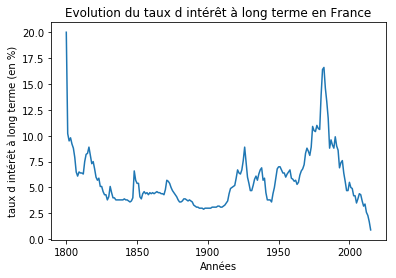

In [87]:
plt.plot(taux.index, taux['TauxInteretLongTerme'])
plt.title('Evolution du taux d intérêt à long terme en France')
plt.xlabel('Années')
plt.ylabel('taux d intérêt à long terme (en %)')
plt.show()

On souhaite maintenant rendre l'affichage de ce graphique interactif en permettant à l'utilisateur de choisir l'année de début et l'année de fin pour le tracé de la courbe :

In [103]:
def view(x, y):
    print(x, y)
    taux_loc = taux.loc[(taux.index >= x) & (taux.index <= y),:]
    plt.plot(taux_loc.index, taux_loc['TauxInteretLongTerme'])
    plt.title('Evolution du taux d intérêt à long terme en France')
    plt.xlabel('Années')
    plt.ylabel('taux d intérêt à long terme (en %)')
    plt.show()

interactive(view,x=(1880,2014), y=(1881,2015))

interactive(children=(IntSlider(value=1947, description='x', max=2014, min=1880), IntSlider(value=1948, descri…

L'année de fin devant être strictement supérieure à l'année de début pour qu'un graphe s'affiche, on pourrait enrichit le code en utilisant la fonction `observe` vue précédemment (cela fait l'objet de la première question de la feuille d'exercice de cette séance).